## Pandas
- Built on top of NumPy  
- high-level dsata proc of cleansing raw data into tidy form suitable for analysis.  
- contains only limited support for statistical modelinh (only linear regression)  
- more sophisticated things can be done with statsmodels, patsy and sklearn  
- but is still used for data representation and prep  
- we will introduce seaborn as well  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

In [2]:
s=pd.Series([909976, 8615246, 2872086, 2273305])

In [3]:
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [4]:
type(s)

pandas.core.series.Series

In [7]:
list(s.index)


[0, 1, 2, 3]

In [8]:
s.values

array([ 909976, 8615246, 2872086, 2273305], dtype=int64)

With a Series object it's possible to use to use the city names as indices rather
than integers, and we can assign the index attribute
of a Series object to a list with new indices to accomplish this. We can also set the name
attribute of the Series object, to give it a descriptive name

In [9]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [10]:
s.name

'Population'

# ways to access our data

In [11]:
s['London']

8615246

In [12]:
s[0]

909976

In [14]:
s.Paris

2273305

## Indexing a Series object with a list of indices gives a new Series object

In [15]:
k=s[["Paris", "Rome"]]

In [17]:
print(k,type(k))

Paris    2273305
Rome     2872086
Name: Population, dtype: int64 <class 'pandas.core.series.Series'>


In [18]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

### With a data series represented as a Series object, we can easily compute its descriptive statistics using the Series methods.  
### Using the plot method, we can quickly and easily produce graphs that visualize the data in a Series object. The pandas library uses Matplotlib for plotting, and we can optionally pass a Matplotlib Axes instance to the plot method via the ax argument. The type of the graph is specified using the kind argument (valid options are line, hist, bar, barh, box, kde, density, area, and pie).

In [19]:
plt.subplots?

Text(0.5,1,'Simple plot')

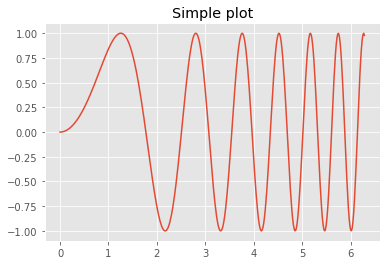

In [20]:
#First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
#Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')


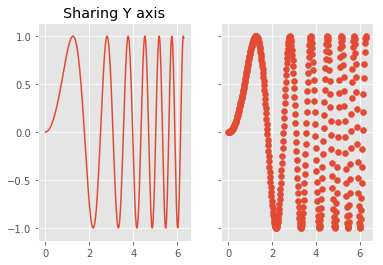

In [25]:
#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) #1 linha, 2 colunas, dividindo o y. Gera a figura f e dois eixos (figure do matlab)
ax1.plot(x, y) #pega o x, pega o y e plota normal no ax1
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)  #pega o x, pega o y e plota tipo scatter no espaço destinado a ax2


In [26]:
type(ax2)

matplotlib.axes._subplots.AxesSubplot

In [24]:
type(f)

matplotlib.figure.Figure

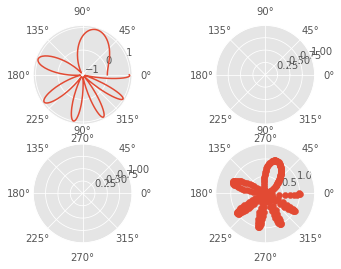

In [28]:
#Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y) #faz um line plot no 
axes[1, 1].scatter(x, y)


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217258F3978>,
       dtype=object))

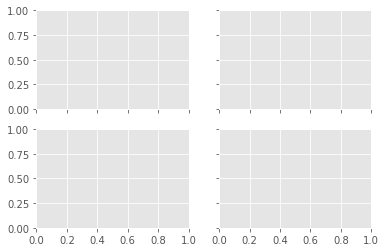

In [34]:
#Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021725797588>,
       dtype=object))

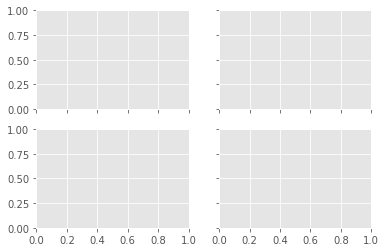

In [35]:
#Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

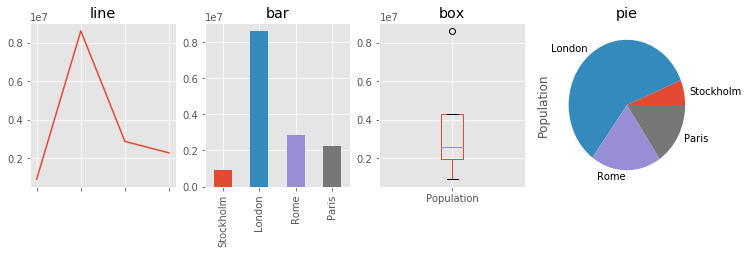

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

# Data Frame
For higher-dimensional arrays (mainly two-dimensional arrays, or tables), the
corresponding data structure is the Pandas DataFrame object. It can be viewed as a collection of Series objects with a common index.  
-  For example, consider an extension of the dataset we used in the previous section, where, in addition to the population of each city, we also include a column that specifies which state each city belongs to. We can create the corresponding DataFrame object in the following way:


In [38]:
df = pd.DataFrame([[909976, "Sweden"],
 ...: [8615246, "United Kingdom"],
 ...: [2872086, "Italy"],
 ...: [2273305, "France"]])

In [39]:
df

0               1
0   909976          Sweden
1  8615246  United Kingdom
2  2872086           Italy
3  2273305          France

In [41]:
 df = pd.DataFrame([[909976, "Sweden"],
 ...: [8615246, "United Kingdom"],
 ...: [2872086, "Italy"],
 ...: [2273305, "France"]],
 ...: index=["Stockholm", "London", "Rome", "Paris"],
 ...: columns=["Population", "State"])
df

Population           State
Stockholm      909976          Sweden
London        8615246  United Kingdom
Rome          2872086           Italy
Paris         2273305          France

An alternative way to create the same data frame, which sometimes can be more convenient, is to pass a dictionary with column titles as keys and column data as values:

In [44]:
 df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],"State": ["Sweden", "United Kingdom", "Italy",
"France"]}, index=["Stockholm", "London", "Rome", "Paris"])

In [43]:
df

Population           State
Stockholm      909976          Sweden
London        8615246  United Kingdom
Rome          2872086           Italy
Paris         2273305          France

In [48]:
print(type(df.loc['Rome']))
df.loc['Rome']

<class 'pandas.core.series.Series'>


Population    2872086
State           Italy
Name: Rome, dtype: object

Passing a list of row labels to the loc indexer results in a new DataFrame that is a
subset of the original DataFrame, containing only the selected rows

In [49]:
 df.loc[["Paris", "Rome"]]

Population   State
Paris     2273305  France
Rome      2872086   Italy

In [55]:
 df.loc[['Rome'],['State']]

State
Rome  Italy

In [56]:
 df.loc[['Rome'],['State', 'Population']]

State  Population
Rome  Italy     2872086

In [57]:
df.mean()

Population    3667653.25
dtype: float64

In [58]:
df

Population           State
Stockholm      909976          Sweden
London        8615246  United Kingdom
Rome          2872086           Italy
Paris         2273305          France

In this case, only one of the two columns has a numerical data type (the one named
Population). Using the DataFrame method info and the attribute dtypes, we can obtain
a summary of the content in a DataFrame and the data types of each column

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [61]:
df.dtypes #apenas um é numérico

Population     int64
State         object
dtype: object

In [62]:
 help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

- header- specifies which row, if any, contains a header with column names)  
- skiprows (number of rows to skip before starting to read data, or a list of line numbers of lines to skip)  
- delimiter (the character that is used as a delimiter between column values)  
- encoding (the name of the encoding used in the file, e.g., utf-8)  
- nrows (number of rows to read)  
*The first and only mandatory argument to the pd.read_csv function is a filename or a URL to the data source.*  




In [67]:
df_pop = pd.read_csv("european_cities.csv")
df_pop.head()

Rank       City            State Population Date of census/estimate
0     1  London[2]   United Kingdom  8,615,246             1 June 2014
1     2     Berlin          Germany  3,437,916             31 May 2014
2     3     Madrid            Spain  3,165,235          1 January 2014
3     4       Rome            Italy  2,872,086       30 September 2014
4     5      Paris           France  2,273,305          1 January 2013

In [69]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


 Only
the Rank column is of a numerical data type. In particular, the Population column is
not yet of numeric data type because its values are of the format "8,615,246" and is
therefore interpreted as string values by the read_csv function. It is also informative
to display a tabular view of the data. However, this dataset is too large to display in full,
and in situations like this, the head and tail methods are handy for creating a truncated
dataset containing the first few and last few rows, respectively. Both of these functions
take an optional argument that specifies how many rows to include in the truncated
DataFrame.

In [70]:
df_pop.tail(3)

Rank        City            State Population Date of census/estimate
102   103  Nottingham   United Kingdom    308,735            30 June 2012
103   104    Katowice           Poland    308,269            30 June 2012
104   105      Kaunas        Lithuania    306,888          1 January 2013

In [72]:
df_pop.loc[[102],['City','State','Population']]

City            State Population
102  Nottingham   United Kingdom    308,735

#### we can create new columns and update columns in a DataFrame simply by assigning a Series object to the DataFrame indexed by the column name, and we can delete columns using the Python del keyword.  
- The apply method is a powerful tool to transform the content in a column. It creates and returns a new Series object for which a function passed to apply has been applied to each element in the original column. 
##### we can use the apply method to transform the elements in the Population column from strings to integers, by passing a lambda function that removes the "," characters from the strings and casts the results to an integer

Here we assign the transformed column to a new column with the name
NumericPopulation.

In [81]:
 df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [82]:
df_pop.head()

Rank       City           State Population Date of census/estimate  \
0     1  London[2]  United Kingdom  8,615,246             1 June 2014   
1     2     Berlin         Germany  3,437,916             31 May 2014   
2     3     Madrid           Spain  3,165,235          1 January 2014   
3     4       Rome           Italy  2,872,086       30 September 2014   
4     5      Paris          France  2,273,305          1 January 2013   

   NumericPopulation  
0            8615246  
1            3437916  
2            3165235  
3            2872086  
4            2273305

In [86]:
df_pop["State"].values[:3]

array(['United Kingdom', 'Germany', 'Spain'], dtype=object)

In [87]:
 df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [88]:
df_pop.head()

Rank       City           State Population Date of census/estimate  \
0     1  London[2]  United Kingdom  8,615,246             1 June 2014   
1     2     Berlin         Germany  3,437,916             31 May 2014   
2     3     Madrid           Spain  3,165,235          1 January 2014   
3     4       Rome           Italy  2,872,086       30 September 2014   
4     5      Paris          France  2,273,305          1 January 2013   

   NumericPopulation  
0            8615246  
1            3437916  
2            3165235  
3            2872086  
4            2273305

In [90]:
#vamos ver se a população ficou inteiro
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

Pode ser que eu queira usar outra coluna como índice. Ex, se quero usar a coluna City como index. O resultado é um novo objeto Dataframe e o original é preservado. Usando o método sort_index, podemos sortar o dataframe com relação àquele índice.

In [93]:
 df_pop2 = df_pop.set_index("City")
df_pop2.head()

Rank           State Population Date of census/estimate  \
City                                                                 
London[2]     1  United Kingdom  8,615,246             1 June 2014   
Berlin        2         Germany  3,437,916             31 May 2014   
Madrid        3           Spain  3,165,235          1 January 2014   
Rome          4           Italy  2,872,086       30 September 2014   
Paris         5          France  2,273,305          1 January 2013   

           NumericPopulation  
City                          
London[2]            8615246  
Berlin               3437916  
Madrid               3165235  
Rome                 2872086  
Paris                2273305

In [95]:
df_pop2 = df_pop2.sort_index()
df_pop2.head()

Rank        State Population Date of census/estimate  \
City                                                              
Aarhus       92      Denmark    326,676          1 October 2014   
Alicante     86        Spain    334,678          1 January 2012   
Amsterdam    23  Netherlands    813,562             31 May 2014   
Antwerp      59      Belgium    510,610          1 January 2014   
Athens       34       Greece    664,046             24 May 2011   

           NumericPopulation  
City                          
Aarhus                326676  
Alicante              334678  
Amsterdam             813562  
Antwerp               510610  
Athens                664046

In [96]:
df_pop2.tail()

Rank    State Population Date of census/estimate  NumericPopulation
City                                                                          
Wrocław      35   Poland    632,432           31 March 2014             632432
Wuppertal    83  Germany    342,885        31 December 2012             342885
Zagreb       24  Croatia    790,017           31 March 2011             790017
Zaragoza     33    Spain    666,058          1 January 2014             666058
Łódź         28   Poland    709,757           31 March 2014             709757

O método sort_index tbm aceita uma lista de nomes de colunas. Assim, crio uma indexação hierárquica.  
 A hierarchical index uses tuples of index labels to address
rows in the data frame. We can use the sort_index method with the integer-valued
argument level, to sort the rows in a DataFrame according to the nth level of the
hierarchical index, where level=n. In the following example, we create a hierarchical
index with State and City as indices, and we use the sort_index method to sort by the
first index (State):

In [97]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)

In [98]:
 df_pop3.head(7)


Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

## Indexação no caso de índice hierárquico:  
- A DataFrame with a hierarchical index can be partially indexed using only its zerothlevel index (df3.loc["Sweden"]) or completely indexed using a tuple of all hierarchical
indices (df3.loc[("Sweden", "Gothenburg")]):

In [99]:
 df_pop3.loc["Bulgaria"]


Rank Population Date of census/estimate  NumericPopulation
City                                                               
Plovdiv    84    341,041        31 December 2013             341041
Sofia      14  1,291,895        14 December 2014            1291895
Varna      85    335,819        31 December 2013             335819

In [100]:
 df_pop3.loc[("Bulgaria", "Varna")]


Rank                                     85
Population                          335,819
Date of census/estimate    31 December 2013
NumericPopulation                    335819
Name: (Bulgaria, Varna), dtype: object

### Sortando por coluna:   
- sort_values  
- It takes a column name, or a list of column names, with respect to which the DataFrame is to be sorted. It also accepts the keyword argument ascending, which is a Boolean or a list of Boolean values that specifies whether the corresponding column is to be sorted in ascending or descending order

In [101]:
 df_pop.set_index("City").sort_values(["State", "NumericPopulation"],
 ...: ascending=[False, True]).head()

Rank           State Population Date of census/estimate  \
City                                                                  
Nottingham   103  United Kingdom    308,735            30 June 2012   
Wirral        97  United Kingdom    320,229            30 June 2012   
Coventry      94  United Kingdom    323,132            30 June 2012   
Wakefield     91  United Kingdom    327,627            30 June 2012   
Leicester     87  United Kingdom    331,606            30 June 2012   

            NumericPopulation  
City                           
Nottingham             308735  
Wirral                 320229  
Coventry               323132  
Wakefield              327627  
Leicester              331606

Vamos agora contar quantos valores de cada categoria uma coluna contem. Na coluna State:

In [103]:
contagem=df_pop.State.value_counts()
contagem.head()

Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: State, dtype: int64

# PAREI NA PÁGINA 420 DO LIVRO